In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_5 = data.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [6]:
c = data.loc[:,['Dependents']]
c.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [10]:
data_5 = data.loc[:,'Contract':]
data_5.head()

,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,One year,No,Mailed check,56.95,1889.5,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
senior_male_electronic = data[(data['gender']=='Male') & (data['SeniorCitizen']==1) & (data['PaymentMethod']=='Electronic check')]
senior_male_electronic.shape

(298, 21)

In [17]:
customer_total_tenure = data[(data['tenure']>70) | (data['MonthlyCharges']>100)]
customer_total_tenure.shape

(1259, 21)

In [21]:
two_mail_yes = data[(data['Contract']=='Two year') & (data['PaymentMethod']=='Mailed check') & (data['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [26]:
customer_333 = data.sample(333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4666,8780-RSYYU,Female,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.20,532.1,No
2021,0181-RITDD,Male,0,Yes,Yes,62,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,108.15,6825.65,No
4460,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,No
6414,3472-QPRCH,Male,0,Yes,Yes,40,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.25,1006.9,No
313,2799-ARNLO,Female,1,Yes,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,341.6,No


In [27]:
len(customer_333)

333

In [39]:
p = data['Contract'].value_counts()

In [41]:
rs = pd.DataFrame(p)

In [42]:
rs

,Contract
Month-to-month,3875
Two year,1695
One year,1473


# Data Visualization

In [43]:
%matplotlib inline

In [60]:
x = data['InternetService'].value_counts().keys().tolist()
y = data['InternetService'].value_counts().tolist()

print(x)
print(y)

['Fiber optic', 'DSL', 'No']
[3096, 2421, 1526]


Text(0.5, 1.0, 'Distribution of internet service')

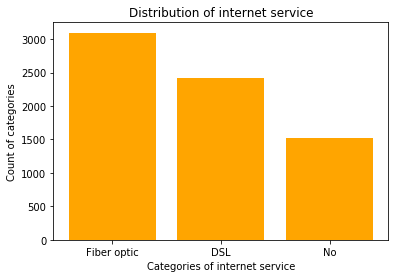

In [62]:
plt.bar(x,y,color='orange')
plt.xlabel('Categories of internet service')
plt.ylabel('Count of categories')
plt.title('Distribution of internet service')

Text(0.5, 1.0, 'Distribution of tenure')

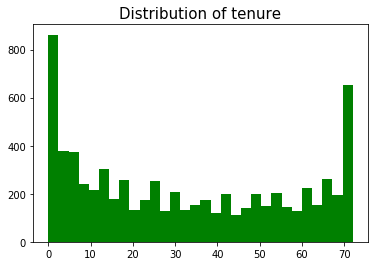

In [69]:
plt.hist(data['tenure'], color = 'green', bins = 30)
plt.title('Distribution of tenure',size = 15)

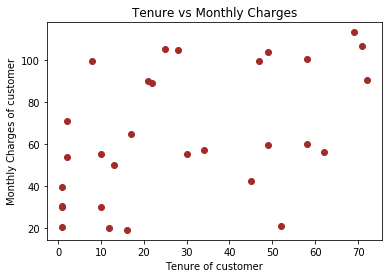

In [73]:
plt.scatter(x = data['tenure'].head(30), y = data['MonthlyCharges'].head(30), color = 'brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

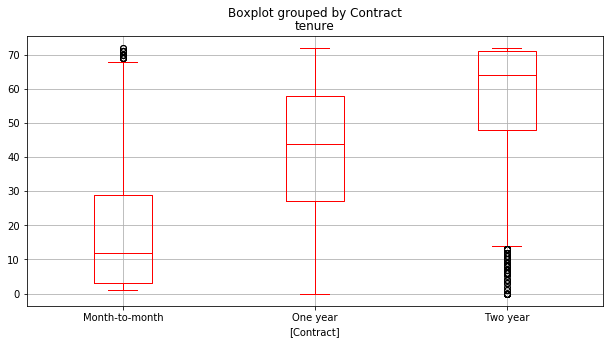

In [78]:
data.boxplot(column = 'tenure', by = ['Contract'], figsize = (10,5), color = 'red')
plt.show()

In [80]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [81]:
x = data['Contract'].value_counts().keys().tolist()
y = data['Contract'].value_counts().tolist()

<BarContainer object of 3 artists>

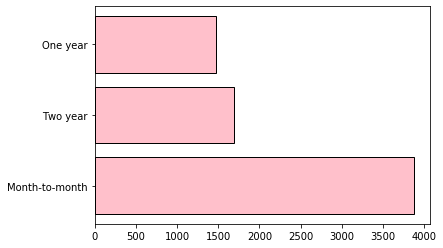

In [85]:
plt.barh(x, y, color = 'pink', edgecolor = 'black')

## Linear Regression:


In [86]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [88]:
X = data.loc[:,['tenure']]. values
y = data.loc[:,['MonthlyCharges']].values

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
from sklearn.linear_model import LinearRegression
simple = LinearRegression()
simple.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_pred = simple.predict(x_test)
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [121]:
y_test

array([[ 58.2 ],
       [116.6 ],
       [ 71.95],
       ...,
       [109.95],
       [ 24.55],
       [ 81.6 ]])

In [115]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

29.394584027273893

## Logistic Regression:

In [122]:
x = data.loc[:,['MonthlyCharges']].values
y = data.loc[:,['Churn']].values

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size = .65, random_state = 0)

In [132]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [133]:
logmodel.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
predict = logmodel.predict(x_test)
predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [136]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [138]:
confusion_matrix(predict,y_test)

array([[1815,  651],
       [   0,    0]], dtype=int64)

In [139]:
accuracy_score(y_test,predict)

0.7360097323600974

## Build  a multiple Logistic Regression model
where dependent in churn and independent variable are tenure and Monthly Charges

In [141]:
x = data.loc[:,['MonthlyCharges','tenure']].values
y = data.loc[:,['Churn']].values

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .80, random_state = 0)

In [143]:
logmodel.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_predict = logmodel.predict(x_test)
y_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [145]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [150]:
confusion_matrix(y_test,y_predict)

array([[934, 107],
       [212, 156]], dtype=int64)

In [151]:
accuracy_score(y_test,y_predict)

0.7735982966643009

## Decision Tree

In [152]:
x = data.loc[:,['tenure']]. values
y = data.loc[:,['Churn']]. values

In [153]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.20)

In [154]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()


In [155]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [161]:
y_pred = classifier.predict(x_test)

In [162]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [158]:
y_test

array([['Yes'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [163]:
confusion_matrix(y_test, y_pred)

array([[965,  77],
       [256, 111]], dtype=int64)

In [164]:
accuracy_score(y_test, y_pred)

0.7636621717530163

## Random Forest:

In [165]:
x = data.loc[:,['tenure','MonthlyCharges']].values
y = data.loc[:,['Churn']].values

In [166]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.30)

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rfc = RandomForestClassifier(n_estimators=200) # it means how want tree we want
rfc.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
pred = rfc.predict(x_test)
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [183]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [184]:
confusion_matrix(y_test, pred)

array([[1335,  222],
       [ 319,  237]], dtype=int64)

In [189]:
print('Accuracy:',accuracy_score(y_test, pred))

Accuracy: 0.7439659252247989


## Build a multiple Logistic Regression model

In [196]:
x = data.loc[:,['MonthlyCharges','tenure','SeniorCitizen']].values
y = data.loc[:,['Churn']].values

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .80, random_state = 0)

In [198]:
logmodel.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
y_predict = logmodel.predict(x_test)
y_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [200]:
confusion_matrix(y_test,y_predict)

array([[932, 109],
       [198, 170]], dtype=int64)

In [201]:
accuracy_score(y_test,y_predict)

0.7821149751596878